In [2]:
import cooler
import sys
sys.path.append("./code")

import pandas as pd
from ast import literal_eval
import treg_functions
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import scipy, scipy.stats
from hic_zscore_functions import *
from treg_functions import *
from old_make_figures import *
from tad_functions import *
from aux_functions import *

plt.rcParams['svg.fonttype'] = 'none'

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [5]:
PARSED_CHROMS = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9', 'X']

In [6]:
import aux_functions
from aux_functions import *


In [7]:
import pybedtools as pbt
all_tcon_v_treg = add_chr_to_bedtool(pbt.BedTool('./atac/differential/Tcon_all.csv'))
all_windows = pbt.BedTool('/Genomics/argo/users/gdolsten/pritlab/proteins/make_dna_model/mm10/mm10.windows_all.window=5000')

In [8]:
import scanpy as sc
sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['axes.grid.which']
sc.settings.verbosity = 4  # verbosity: errors (0), warnings (1), info (2), hints (3)
# warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})
sc.logging.print_header()

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Genomic

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.6 pynndescent==0.5.10


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [9]:
comp = pickle.load(open('./intermediate_files/my_treg_comp_50kb', 'rb'))

In [10]:
import glob
atac_dict = {}
for i in glob.glob('./atac/processed/*thresh*.csv'):
    cond1, cond2 = i.split('/')[-1].split("_thresh")[0].split("_vs_")
    thresh = float(i.split(".csv")[0].split("_thresh=")[1])
    if thresh not in [0, .5]:
        continue
    else:
        atac_dict[f'{cond1}_vs_{cond2}_thresh={thresh}'] = add_chr_to_bedtool(pbt.BedTool(i))

In [11]:
def filter_bad_from_list(l, bad):
    assert len(l) == len(bad)
    newl = []
    for c, i in enumerate(l):
        if bad[c]:
            pass
        else:
            newl.append(i)
    return newl

In [12]:
import pickle

def get_vals(inp):
    bw_path, name, chrom, s, e = inp
    bins = 1
    bw = bbi.open(bw_path)
    if bins:
        bw_vals = (bw.stackup(chrom, s, e, bins=bins).mean(axis=1))
    else:
        bw_vals = (bw.stackup(chrom, s, e).mean(axis=1))
    granges = [tuple_to_grange(*x) for x in zip(chrom, s, e)]
    
    tmpdf = pd.DataFrame()
    tmpdf[name] = bw_vals
    tmpdf.index = granges
    tmpdf.to_csv(f'./tmp/{name}.csv')
    return tmpdf

In [13]:
def aggregate_chip_data():
    import glob
    import time
    atac_pref = '/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/atac_bws/'
    atac_inputs = []
    for c, bw_path in enumerate(glob.glob(atac_pref + "*.bw")):
        name = bw_path.split("/")[-1]
        atac_inputs.append([bw_path, name, chrom, s, e])
        
        
    bw_pref = '/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/'
    bw_inputs = []
    for c, bw_path in enumerate(glob.glob(bw_pref + "*.bw")):
        name = bw_path.split("/")[-1]
        bw_inputs.append([bw_path, name, chrom, s, e])
        
        
    cutrun_pref = '/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/cutrun_bws/'
    cutrun_inputs = []
    for c, cutrun_path in enumerate(glob.glob(cutrun_pref + "*.bw")):
        name = cutrun_path.split("/")[-1]
        cutrun_inputs.append([cutrun_path, name, chrom, s, e])
    from concurrent.futures import ProcessPoolExecutor
    
    n_workers = 50
    with ProcessPoolExecutor(max_workers=n_workers) as executor:
        loop_parts = executor.map(get_vals, atac_inputs, chunksize=1)
        
    atac_val_df = pd.DataFrame()
    for part in loop_parts:
        tmpdf = part
        atac_val_df = pd.concat([atac_val_df, tmpdf], axis=1)
    
    from concurrent.futures import ProcessPoolExecutor
    
    n_workers = 50
    with ProcessPoolExecutor(max_workers=n_workers) as executor:
        loop_parts = executor.map(get_vals, cutrun_inputs, chunksize=1)
        
    cutrun_val_df = pd.DataFrame()
    for part in loop_parts:
        tmpdf = part
        cutrun_val_df = pd.concat([cutrun_val_df, tmpdf], axis=1)
    
    from concurrent.futures import ProcessPoolExecutor
    
    n_workers = 50
    with ProcessPoolExecutor(max_workers=n_workers) as executor:
        loop_parts = executor.map(get_vals, bw_inputs, chunksize=1)
        
    bw_val_df = pd.DataFrame()
    for part in loop_parts:
        tmpdf = part
        bw_val_df = pd.concat([bw_val_df, tmpdf], axis=1)
    
    import psutil
    val_df = pd.concat([bw_val_df, atac_val_df], axis=1)
    
    !mkdir dfs_over_all_enhancers
    
    bw_val_df.to_csv('./dfs_over_all_enhancers/bw_val_df', sep='\t')
    atac_val_df.to_csv('./dfs_over_all_enhancers/atac_val_df', sep='\t')
    cutrun_val_df.to_csv('./dfs_over_all_enhancers/cutrun_val_df', sep='\t')

In [ ]:
windows_in_enhancers = all_windows
chrom, s, e =  unzreg(windows_in_enhancers)[:3]
delta = arr(e).astype(int)-arr(s).astype(int)
bad = delta != np.median(delta)
chrom, s, e = filter_bad_from_list(chrom, bad), filter_bad_from_list(s, bad), filter_bad_from_list(e, bad)

aggregate_chip_data()

In [14]:
from scipy.stats import zscore
import scanpy as sc

In [15]:
CHIP_TRACKS = set(['H3K27me3_ChIP-seq_of_Tconv', '_aTreg_Foxp3_ChIP_Rep2__Mus_musculus__ChIP-Seq', 'Med1_ChIP-seq_of_Tconv', '904C1_Relap65ChIP_Tconv_periphery_WT_stimulated_rep1', '_Foxp1_ChIP-seq_in_conventional_T_cells__rep1__Mus_musculus__ChIP-Seq', '_Foxp1_ChIP-seq_in_Foxp1+_Treg__rep3__Mus_musculus__ChIP-Seq', '371a_H3K4me1ChIP_CD19Bcell_spleen_rep1', '_Foxp3_ChIP-seq_in_Foxp1-_conventional_T_cells__rep1__genetic_control___Mus_musculus__ChIP-Seq', '132c_H3K4me1ChIP_immCD4SP_thymus_CNS0KO_rep3', 'Smc1a_ChIP-seq_of_DP', '_Foxp3_ChIP-seq_in_Foxp1+_Treg__rep2__Mus_musculus__ChIP-Seq', '352b_H3K27acChIP_CD3negEarlyDP_thymus_rep2', '372a_H3K27acChIP_CD19Bcell_spleen_rep1', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_tTreg_precursor_replicate_1', '_Foxp1_ChIP-seq_in_Foxp1-_Treg__genetic_control___Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_DP_replicate_1', 'H3K27ac_ChIP-seq_of_activated_Tconv', '361a_H3K4me1ChIP_CD3posLateDP_thymus_rep1', '_mTr_H3K27me3_rep1__Sample_48___Mus_musculus__ChIP-Seq', '901R2a_Stat5ChIP_Treg_periphery_WT_rep2', '_Foxp1_ChIP-seq_in_Foxp1+_Treg__rep2__Mus_musculus__ChIP-Seq', '322a_H3K27acChIP_DN2_thymus_rep1', '003b_H3K27acChIP_Treg_periphery_CNS3KO_rep2', '_Foxp3GFPKO_H3K27me3_ChIP_Rep1__Mus_musculus__ChIP-Seq', '_Foxp1_ChIP-seq_in_conventional_T_cells__rep1__Mus_musculus__ChIP-Seq', '_aTreg_Input_Rep1__Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_tTreg_precursor_replicate_2', 'H3K4me1_ChIP-seq_of_Cd4CreSatb1CKO_immature_CD4SP', '_Foxp3_ChIP-seq_in_Foxp1-_Treg__rep2__Mus_musculus__ChIP-Seq', 'Satb1_ChIP-seq_of_Treg', 'Runx1_ChIP-seq_of_DP', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_immature_CD4SP_replicate_2', '321b_H3K4me1ChIP_DN2_thymus_rep2', '121b_H3K4me1ChIP_DP_thymus_WT_rep2', 'H3K27ac_ChIP-seq_of_tTreg_precursor_replicate_1', 'H3K4me3_ChIP-seq_of_Tconv', '901R2d_Stat5ChIP_Treg_periphery_CNS03dKO_rep2', '361b_H3K4me1ChIP_CD3posLateDP_thymus_rep2', '_Foxp3_ChIP-seq_bulk_Treg_rep3__Mus_musculus__ChIP-Seq', '_mTr_H3K27Ac_rep2__Sample_54___Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_immature_CD4SP_replicate_1', '301b_H3K4me1ChIP_BMckitProgenitor_bone_rep2', '_Foxp1_ChIP-seq_in_conventional_T_cells__rep2__Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_immature_CD4SP_replicate_2', '302b_H3K27acChIP_BMckitProgenitor_bone_rep2', '_Foxp1_ChIP-seq_in_Foxp1+_Treg__rep3__Mus_musculus__ChIP-Seq', '_Foxp3_ChIP-seq_in_Foxp1-_Treg__rep3__Mus_musculus__ChIP-Seq', '_Teff_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq', '_rTr_H3K27me3_rep2__Sample_45___Mus_musculus__ChIP-Seq', '904R1_Relap65ChIP_Treg_periphery_WT_stimulated_rep1', '904C2_Relap65ChIP_Tconv_periphery_WT_stimulated_rep2', '902C2_Ep300ChIP_Tconv_periphery_WT_rep2', '351a_H3K4me1ChIP_CD3negEarlyDP_thymus_rep1', '999R2_IgGcontrolChIP_Treg_periphery_WT_rep2', '_Foxp3_ChIP-seq_in_Foxp1+_conventional_T_cells__rep3__genetic_control___Mus_musculus__ChIP-Seq', '901C3_Stat5ChIP_Tconv_periphery_WT_rep3', '_rTr_H3K4me1_rep2__Sample_39___Mus_musculus__ChIP-Seq', 'Foxp3_ChIP-seq_of_Treg', '_rTreg_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq', 'Ets1_ChIP-seq_of_DP', '352a_H3K27acChIP_CD3negEarlyDP_thymus_rep1', '_rTr_H3K4me1_rep1__Sample_38___Mus_musculus__ChIP-Seq', 'Ets1_ChIP-seq_of_Treg', '321Ra_H3K4me1ChIP_DN2_thymus_Rag2KO_rep1', '_CD4_Cbfb_ChIP__Mus_musculus__ChIP-Seq', '_aFoxp3GFPKO_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_activated_Treg', 'H3K4me1_ChIP-seq_of_CD8+_T_cells', '_CD4_Ets1_ChIP__Mus_musculus__ChIP-Seq', '302a_H3K27acChIP_BMckitProgenitor_bone_rep1', '132a_H3K4me1ChIP_immCD4SP_thymus_CNS0KO_rep1', '371b_H3K4me1ChIP_CD19Bcell_spleen_rep2', 'CD4_Tcell_CTCF_ChIP', '134a_H3K4me1ChIP_immCD4SP_thymus_CNS03dKO_rep1', 'H3K27me3_ChIP-seq_of_DP', 'H3K27ac_ChIP-seq_of_Treg_replicate_2', '_Foxp1_ChIP-seq_in_conventional_T_cells__rep2__Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_DP_replicate_2', '_aTr_H3K4me1_rep1__Sample_40___Mus_musculus__ChIP-Seq', '903C2_Tet2ChIP_Tconv_periphery_WT_rep2', 'H3K4me1_ChIP-seq_of_DN', '124a_H3K4me1ChIP_DP_thymus_CNS03dKO_rep1', '999C2_IgGcontrolChIP_Tconv_periphery_WT_rep2', '134b_H3K4me1ChIP_immCD4SP_thymus_CNS03dKO_rep2', '003a_H3K27acChIP_Treg_periphery_CNS3KO_rep1', '_Foxp1_ChIP-seq_in_Foxp1+_Treg__rep1__Mus_musculus__ChIP-Seq', 'H3K4me3_ChIP-seq_of_tTreg_precursor', '_Treg_Foxp3_ChIP_Rep1__Tech_Rep1___Mus_musculus__ChIP-Seq', '_Foxp3_ChIP-seq_in_Foxp1-_conventional_T_cells__rep3__genetic_control___Mus_musculus__ChIP-Seq', '_Foxp3_ChIP-seq_bulk_Treg_rep2__Mus_musculus__ChIP-Seq', '_rTreg_H3K27me3_ChIP_Rep1__Mus_musculus__ChIP-Seq', '903C1_Tet2ChIP_Tconv_periphery_WT_rep1', '332a_H3K27acChIP_DN3_thymus_rep1', 'Runx1_ChIP-seq_of_Treg', '004c_H3K27acChIP_Treg_periphery_CNS03dKO_rep3', '001c_H3K27acChIP_Treg_periphery_WT_rep3', '_Foxp3_ChIP-seq_in_Foxp1-_Treg__rep1__Mus_musculus__ChIP-Seq', 'H3K27me3_ChIP-seq_of_tTreg_precursor', '_Input_WT__Mus_musculus__ChIP-Seq', 'H3K4me3_ChIP-seq_of_Treg', 'H3K27me3_ChIP-seq_of_immature_CD4SP', '331a_H3K4me1ChIP_DN3_thymus_rep1', '_rTr_H3K27me3_rep1__Sample_44___Mus_musculus__ChIP-Seq', '_aFoxp3GFPKO_H3K27me3_ChIP_Rep1__Mus_musculus__ChIP-Seq', '_Foxp1_ChIP-seq_in_Foxp1+_Treg__rep2__Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_CD8+_T_cells', '_H3K9me3_WT__Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_immature_CD4SP_replicate_1', '_Treg_Input_Rep2__Mus_musculus__ChIP-Seq', 'H3K4me1_ChIP-seq_of_Tconv', '003c_H3K27acChIP_Treg_periphery_CNS3KO_rep3', 'H3K27ac_ChIP-seq_of_tTreg_replicate_1', '_Foxp3_ChIP-seq_in_Foxp1+_conventional_T_cells__rep1__genetic_control___Mus_musculus__ChIP-Seq', '321a_H3K4me1ChIP_DN2_thymus_rep1', '002c_H3K27acChIP_Treg_periphery_CNS0KO_rep3', '901R1_Stat5ChIP_Treg_periphery_WT_rep1', 'Satb1_ChIP-seq_of_peripheral_Tconv', 'CREB_ChIP-seq_of_DP', '_aTr_H3K27me3_rep2__Sample_47___Mus_musculus__ChIP-Seq', 'Input_of_transcription_factor_ChIP-seq', '123b_H3K4me1ChIP_DP_thymus_CNS3KO_rep2', '_aTreg_Foxp3_ChIP_Rep1__Tech_Rep_2___Mus_musculus__ChIP-Seq', '_aTr_H3K27Ac_rep2__Sample_52___Mus_musculus__ChIP-Seq', '381b_H3K4me1ChIP_CD8SP_thymus_rep2', '903R2_Tet2ChIP_Treg_periphery_WT_rep2', '372b_H3K27acChIP_CD19Bcell_spleen_rep2', 'H3K4me3_ChIP-seq_of_DP', '_mTr_H3K27Ac_rep1__Sample_53___Mus_musculus__ChIP-Seq', 'H3K4me1_ChIP-seq_of_DP', 'H3K27ac_ChIP-seq_of_Tconv_replicate_1', 'H3K4me1_ChIP-seq_of_tTreg_precursor', 'Ets1_ChIP-seq_of_Tconv', '_Foxp3_ChIP-seq_in_Foxp1+_conventional_T_cells__rep2__genetic_control___Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_ThpokCreSatb1CKO_Foxp3+Tconv', '_Treg_Cbfb_ChIP__Mus_musculus__ChIP-Seq', '_aTr_H3K27me3_rep1__Sample_46___Mus_musculus__ChIP-Seq', '321Rb_H3K4me1ChIP_DN2_thymus_Rag2KO_rep2', 'Input_of_histone_ChIP-seq', 'H3K27ac_ChIP-seq_of_tTreg_precursor_replicate_2', '901R3a_Stat5ChIP_Treg_periphery_WT_rep3', '_Foxp3_ChIP-seq_bulk_Treg_rep1__Mus_musculus__ChIP-Seq', '_CD4_Elf1_ChIP__Mus_musculus__ChIP-Seq', '133b_H3K4me1ChIP_immCD4SP_thymus_CNS3KO_rep2', 'H3K4me3_ChIP-seq_of_tTreg', 'H3K27ac_ChIP-seq_of_DN_thymocytes', '131b_H3K4me1ChIP_immCD4SP_thymus_WT_rep2', '_Treg_Input_Rep1__Mus_musculus__ChIP-Seq', '902R2_Ep300ChIP_Treg_periphery_WT_rep2', '375_input_ChIP_CD19Bcell', '903R1_Tet2ChIP_Treg_periphery_WT_rep1', '002b_H3K27acChIP_Treg_periphery_CNS0KO_rep2', 'H3K4me1_ChIP-seq_of_immature_CD4SP', '122a_H3K4me1ChIP_DP_thymus_CNS0KO_rep1', '_Teff_H3K27me3_ChIP_Rep1__Mus_musculus__ChIP-Seq', 'CREB_ChIP-seq_of_Treg', '301a_H3K4me1ChIP_BMckitProgenitor_bone_rep1', '332b_H3K27acChIP_DN3_thymus_rep2', '_aTreg_Foxp3_ChIP_Rep3__Mus_musculus__ChIP-Seq', '_Foxp3_ChIP-seq_in_Foxp1+_Treg__rep1__Mus_musculus__ChIP-Seq', '132b_H3K4me1ChIP_immCD4SP_thymus_CNS0KO_rep2', '122b_H3K4me1ChIP_DP_thymus_CNS0KO_rep2', 'H3K27me3_ChIP-seq_of_Treg', '133a_H3K4me1ChIP_immCD4SP_thymus_CNS3KO_rep1', '901C1_Stat5ChIP_Tconv_periphery_WT_rep1', '331b_H3K4me1ChIP_DN3_thymus_rep2', '382a_H3K27acChIP_CD8SP_thymus_rep1', 'Satb1_ChIP-seq_of_DP', '999C1_IgGcontrolChIP_Tconv_periphery_WT_rep1', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_Tconv', '_Tn_H3K27me3_ChIP_Rep1__Mus_musculus__ChIP-Seq', '_Treg_Foxp3_ChIP_Rep1__Tech_Rep2___Mus_musculus__ChIP-Seq', '_aTr_H3K4me1_rep2__Sample_41___Mus_musculus__ChIP-Seq', 'H3K27ac_ChIP-seq_of_tTreg_replicate_2', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_Treg', 'Med1_ChIP-seq_of_Treg', '901R3b_Stat5ChIP_Treg_periphery_CNS0KO_rep3', '901R2c_Stat5ChIP_Treg_periphery_CNS3KO_rep2', 'H3K27ac_ChIP-seq_of_Tconv_replicate_2', '123a_H3K4me1ChIP_DP_thymus_CNS3KO_rep1', 'H3K4me1_ChIP-seq_of_Cd4CreSatb1CKO_DP', '351b_H3K4me1ChIP_CD3negEarlyDP_thymus_rep2', '_Foxp3_ChIP-seq_in_Foxp1-_conventional_T_cells__rep2__genetic_control___Mus_musculus__ChIP-Seq', '362b_H3K27acChIP_CD3posLateDP_thymus_rep2', '124b_H3K4me1ChIP_DP_thymus_CNS03dKO_rep2', '904R2_Relap65ChIP_Treg_periphery_WT_stimulated_rep2', 'H3K27ac_ChIP-seq_of_ThpokCreSatb1CKO_Foxp3-Tconv', '999R1_IgGcontrolChIP_Treg_periphery_WT_rep1', '901R3d_Stat5ChIP_Treg_periphery_CNS03dKO_rep3', '_Foxp3GFPKO_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq', '901R2b_Stat5ChIP_Treg_periphery_CNS0KO_rep2', 'CREB_ChIP-seq_of_Tconv', 'H3K4me1_ChIP-seq_of_tTreg', 'H3K27ac_ChIP-seq_of_Treg_replicate_1', '902R1_Ep300ChIP_Treg_periphery_WT_rep1', 'Satb1_ChIP-seq_of_CD4SP', '_rTr_H3K27Ac_rep1__Sample_50___Mus_musculus__ChIP-Seq', '902C1_Ep300ChIP_Tconv_periphery_WT_rep1', 'H3K4me3_ChIP-seq_of_immature_CD4SP', 'Med1_ChIP-seq_of_DP', 'H3K27ac_ChIP-seq_of_Cd4CreSatb1CKO_DP_thymocytes', 'Bcl11b_ChIP-seq_of_DP', '_Treg_Elf1_ChIP__Mus_musculus__ChIP-Seq', '_mTr_H3K27me3_rep2__Sample_49___Mus_musculus__ChIP-Seq', '_Tn_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq', 'Bcl11b_ChIP-seq_of_Treg', '_Treg_Ets1_ChIP__Mus_musculus__ChIP-Seq', '_aTreg_H3K27me3_ChIP_Rep1__Mus_musculus__ChIP-Seq', 'H3K4me1_ChIP-seq_of_Treg', '_Foxp1_ChIP-seq_in_Foxp1-_Treg__genetic_control___Mus_musculus__ChIP-Seq', '301c_H3K4me1ChIP_BMckitProgenitor_bone_rep3', '_aTreg_Foxp3_ChIP_Rep1__Tech_Rep_1___Mus_musculus__ChIP-Seq', '_mTr_H3K4me1_rep2__Sample_43___Mus_musculus__ChIP-Seq', '322b_H3K27acChIP_DN2_thymus_rep2', '_aTr_H3K27Ac_rep1__Sample_51___Mus_musculus__ChIP-Seq', '_Foxp1_ChIP-seq_in_Foxp1+_Treg__rep1__Mus_musculus__ChIP-Seq', '_Treg_Foxp3_ChIP_Rep2__Mus_musculus__ChIP-Seq', 'Runx1_ChIP-seq_of_Tconv', '_aTreg_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq', '901R3c_Stat5ChIP_Treg_periphery_CNS3KO_rep3', '004a_H3K27acChIP_Treg_periphery_CNS03dKO_rep1', 'H3K27me3_ChIP-seq_of_tTreg', '305_input_ChIP_BMckitProgenitor', '_mTr_H3K4me1_rep1__Sample_42___Mus_musculus__ChIP-Seq', 'Treg_CTCF_ChIP', 'Satb1_ChIP-seq_of_tTreg_precursor_and_tTreg', 'Smc1a_ChIP-seq_of_Treg', 'Smc1a_ChIP-seq_of_Tconv', '382b_H3K27acChIP_CD8SP_thymus_rep2', '362a_H3K27acChIP_CD3posLateDP_thymus_rep1', '004b_H3K27acChIP_Treg_periphery_CNS03dKO_rep2', '_aTreg_Foxp3_ChIP_Rep4__Mus_musculus__ChIP-Seq', '002a_H3K27acChIP_Treg_periphery_CNS0KO_rep1', 'Bcl11b_ChIP-seq_of_Tconv', '_Lef1-CUTRUN_activated_Tcon_rep2__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__activated_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_resting_Treg_rep3__Mus_musculus__OTHER', '_TCF1-CUTRUN_activated_Treg_rep1__Mus_musculus__OTHER', '_cJun-CUTRUN_resting_Treg_rep2__Mus_musculus__OTHER', '_IRF4-CUTRUN_resting_Treg_rep1__Mus_musculus__OTHER', '_IRF4-CUTRUN_activated_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_activated_Treg_rep3__Mus_musculus__OTHER', '_Lef1-CUTRUN_activated_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_resting_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_resting_Foxp3-GFPKO_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__resting_Tcon_rep1__Mus_musculus__OTHER', '_Lef1-CUTRUN_resting_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_resting_Treg_rep2__Mus_musculus__OTHER', '_TCF1-CUTRUN_activated_Foxp3-GFPKO_rep3__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__resting_Tcon_rep2__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__activated_Tcon_rep1__Mus_musculus__OTHER', '_Lef1-CUTRUN_resting_Treg_rep2__Mus_musculus__OTHER', '_cJun-CUTRUN_resting_Treg_rep1__Mus_musculus__OTHER', '_Lef1-CUTRUN_activated_Treg_rep2__Mus_musculus__OTHER', '_IRF4-CUTRUN_activated_Treg_rep2__Mus_musculus__OTHER', '_Lef1-CUTRUN_resting_Tcon_rep2__Mus_musculus__OTHER', '_IRF4-CUTRUN_resting_Tcon_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__activated_Tcon_rep2__Mus_musculus__OTHER', '_cJun-CUTRUN_activated_Treg_rep2__Mus_musculus__OTHER', '_Foxp3_CUTRUN_bulk_Treg_rep2__Mus_musculus__OTHER', '_IRF4-CUTRUN_resting_Treg_rep2__Mus_musculus__OTHER', '_IRF4-CUTRUN_resting_Tcon_rep2__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__resting_Treg_rep1__Mus_musculus__OTHER', '_cJun-CUTRUN_activated_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_resting_Foxp3-GFPKO_rep3__Mus_musculus__OTHER', '_TCF1-CUTRUN_activated_Foxp3-GFPKO_rep1__Mus_musculus__OTHER', '_Foxp3_CUTRUN_bulk_Treg_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_activated_Foxp3-GFPKO_rep2__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__activated_Treg_rep2__Mus_musculus__OTHER', '_Lef1-CUTRUN_resting_Tcon_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN__exp2__resting_Treg_rep2__Mus_musculus__OTHER', '_Foxp3_CUTRUN_bulk_Treg_rep3__Mus_musculus__OTHER', '_TCF1-CUTRUN_activated_Treg_rep2__Mus_musculus__OTHER', '_cJun-CUTRUN_resting_Tcon_rep2__Mus_musculus__OTHER', '_cJun-CUTRUN_resting_Tcon_rep1__Mus_musculus__OTHER', '_Lef1-CUTRUN_activated_Tcon_rep1__Mus_musculus__OTHER', '_TCF1-CUTRUN_resting_Foxp3-GFPKO_rep2__Mus_musculus__OTHER', '_ATAC-seq_activated_Treg_rep2__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Tcon_rep2__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Treg_GFP-DTR_WT_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Treg_rep1__Mus_musculus__ATAC-seq', '841b_ATAC_BMckitProgenitor_BM_WT_rep2', '_ATAC-seq_Wild-type_resting_Foxp3-GFP-Cre-KO_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_Tcf7_heterozygous_resting_Foxp3-GFP-Cre-KO_rep2__Mus_musculus__ATAC-seq', '_mTr_ATAC_rep2__Sample_37___Mus_musculus__OTHER', '813b_ATAC_Treg_periphery_CNS3KO_rep2', '824a_ATAC_CD4SP_thymus_tTregCD25Foxp3_rep1', '868a_ATAC_ImmCD4SP_thymus_CNS03dKO_rep1', '866b_ATAC_ImmCD4SP_thymus_CNS0KO_rep2', '_ATAC-seq_activated_Treg_GFP-DTR_WT_rep3__Mus_musculus__ATAC-seq', '827a_ATAC_CD4SP_thymus_immCD4_TCRIL2_24h_rep1', '_ATAC-seq_activated_Foxp3-GFPKO_rep3__Mus_musculus__ATAC-seq', '828a_ATAC_CD4SP_thymus_immCD4_TCRantiIL2_24h_rep1', '826b_ATAC_CD4SP_thymus_immCD4_TCRonly_24h_rep2', '822a_ATAC_CD4SP_thymus_prec1CD25SP_rep1', '841a_ATAC_BMckitProgenitor_BM_WT_rep1', 'ATAC-seq_of_DP', '814b_ATAC_Treg_periphery_CNS03dKO_rep2', '_ATAC-seq_activated_Treg_GFP-DTR_WT_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Tcon_rep3__Mus_musculus__ATAC-seq', '848b_ATAC_CD8SP_thymus_rep2', '_ATAC-seq_resting_Treg_rep3__Mus_musculus__ATAC-seq', '_mTr_ATAC_rep1__Sample_36___Mus_musculus__OTHER', '848a_ATAC_CD8SP_thymus_rep1', '823a_ATAC_CD4SP_thymus_prec2Foxp3SP_rep1', '846a_ATAC_CD3negEarlyDP_thymus_rep1', '844b_ATAC_DN3_thymus_WT_rep2', '821a_ATAC_CD4SP_thymus_immatureCD24hi_rep1', '_ATAC-seq_activated_Tcon_rep2__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Tcon_rep4__Mus_musculus__ATAC-seq', '866a_ATAC_ImmCD4SP_thymus_CNS0KO_rep1', '_ATAC-seq_activated_Tcon_rep1__Mus_musculus__ATAC-seq', '852a_ATAC_DN2_thymus_Rag2KO_rep1', '849b_ATAC_CD19Bcell_spleen_rep2', '_ATAC-seq_Wild-type_resting_Foxp3-GFP-Cre-KO_rep3__Mus_musculus__ATAC-seq', '868b_ATAC_ImmCD4SP_thymus_CNS03dKO_rep2', 'ATAC-seq_of_tTreg_precursor', '862a_ATAC_DP_thymus_CNS0KO_rep1', '827b_ATAC_CD4SP_thymus_immCD4_TCRIL2_24h_rep2', '822b_ATAC_CD4SP_thymus_prec1CD25SP_rep2', '827c_ATAC_CD4SP_thymus_immCD4_TCRIL2_24h_rep3', '811a_ATAC_Treg_periphery_WT_rep1', '864a_ATAC_DP_thymus_CNS03dKO_rep1', '829a_ATAC_CD4SP_thymus_immCD4_IL2only_24h_rep1', '828c_ATAC_CD4SP_thymus_immCD4_TCRantiIL2_24h_rep3', '824b_ATAC_CD4SP_thymus_tTregCD25Foxp3_rep2', '844a_ATAC_DN3_thymus_WT_rep1', '865a_ATAC_ImmCD4SP_thymus_WT_rep1', '_ATAC-seq_activated_Treg_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_Wild-type_resting_Foxp3-GFP-Cre-KO_rep2__Mus_musculus__ATAC-seq', '849a_ATAC_CD19Bcell_spleen_rep1', '863b_ATAC_DP_thymus_CNS3KO_rep2', '847b_ATAC_CD3posLateDP_thymus_rep2', '_ATAC-seq_activated_Treg_rep4__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Foxp3-GFPKO_rep2__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Foxp3-GFPKO_rep1__Mus_musculus__ATAC-seq', '812b_ATAC_Treg_periphery_CNS0KO_rep2', '861a_ATAC_DP_thymus_WT_rep1', '_ATAC-seq_activated_Tcon_rep3__Mus_musculus__ATAC-seq', '852b_ATAC_DN2_thymus_Rag2KO_rep2', 'ATAC-seq_of_immature_CD4SP', '_aTr_ATAC_rep1__Sample_34___Mus_musculus__OTHER', 'ATAC-seq_of_Tconv', '_ATAC-seq_resting_Treg_rep4__Mus_musculus__ATAC-seq', '823b_ATAC_CD4SP_thymus_prec2Foxp3SP_rep2', 'ATAC-seq_of_tTreg', '812a_ATAC_Treg_periphery_CNS0KO_rep1', '814a_ATAC_Treg_periphery_CNS03dKO_rep1', '_ATAC-seq_Tcf7_heterozygous_resting_Foxp3-GFP-Cre-KO_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_activated_Foxp3-GFPKO_rep2__Mus_musculus__ATAC-seq', '843a_ATAC_DN2_thymus_WT_rep1', '865b_ATAC_ImmCD4SP_thymus_WT_rep2', '846b_ATAC_CD3negEarlyDP_thymus_rep2', '826c_ATAC_CD4SP_thymus_immCD4_TCRonly_24h_rep3', '_ATAC-seq_resting_Tcon_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_activated_Treg_GFP-DTR_WT_rep2__Mus_musculus__ATAC-seq', '861b_ATAC_DP_thymus_WT_rep2', '_ATAC-seq_activated_Treg_rep3__Mus_musculus__ATAC-seq', '_ATAC-seq_Tcf7_heterozygous_resting_Foxp3-GFP-Cre-KO_rep3__Mus_musculus__ATAC-seq', '811b_ATAC_Treg_periphery_WT_rep2', '862b_ATAC_DP_thymus_CNS0KO_rep2', '821b_ATAC_CD4SP_thymus_immatureCD24hi_rep2', '867b_ATAC_ImmCD4SP_thymus_CNS3KO_rep2', '863a_ATAC_DP_thymus_CNS3KO_rep1', '_ATAC-seq_activated_Foxp3-GFPKO_rep1__Mus_musculus__ATAC-seq', '_ATAC-seq_resting_Treg_rep2__Mus_musculus__ATAC-seq', '_rTr_ATAC_rep2__Sample_33___Mus_musculus__OTHER', '867a_ATAC_ImmCD4SP_thymus_CNS3KO_rep1', '_ATAC-seq_resting_Treg_GFP-DTR_WT_rep3__Mus_musculus__ATAC-seq', 'ATAC-seq_of_Treg', '846c_ATAC_CD3negEarlyDP_thymus_rep3', '_rTr_ATAC_rep1__Sample_32___Mus_musculus__OTHER', '847a_ATAC_CD3posLateDP_thymus_rep1', '843b_ATAC_DN2_thymus_WT_rep2', '829c_ATAC_CD4SP_thymus_immCD4_IL2only_24h_rep3', '_ATAC-seq_resting_Treg_GFP-DTR_WT_rep2__Mus_musculus__ATAC-seq', '829b_ATAC_CD4SP_thymus_immCD4_IL2only_24h_rep2', '828b_ATAC_CD4SP_thymus_immCD4_TCRantiIL2_24h_rep2', '813a_ATAC_Treg_periphery_CNS3KO_rep1', '864b_ATAC_DP_thymus_CNS03dKO_rep2', '_ATAC-seq_activated_Tcon_rep4__Mus_musculus__ATAC-seq', '_aTr_ATAC_rep2__Sample_35___Mus_musculus__OTHER'])

In [16]:
bw_val_df = pd.read_csv('./dfs_over_all_enhancers/bw_val_df', sep='\t', index_col=0)
atac_val_df = pd.read_csv('./dfs_over_all_enhancers/atac_val_df', sep='\t', index_col=0)
cutrun_val_df = pd.read_csv('./dfs_over_all_enhancers/cutrun_val_df', sep='\t', index_col=0)

subdf = pd.concat([bw_val_df, cutrun_val_df, atac_val_df], axis=1)

In [17]:
cols_to_use = []
for col in subdf:
    try:
        if col.split('.')[2] in CHIP_TRACKS:
            cols_to_use.append(col)
    except:
        pass

subdf = subdf[cols_to_use]
subdf.columns = [x.split(".")[2] for x in subdf.columns]
logdf = np.log2(subdf+1)
logdf = logdf.apply(zscore, axis=0)

full_adata = sc.AnnData(logdf)
full_adata.layers['raw_score'] = subdf
full_adata = full_adata

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [18]:
BLACKLIST = pbt.BedTool('/Genomics/argo/users/gdolsten/pritlab/chrombpnet/blacklist/mm10-blacklist.v2.bed'
                                  ).slop(b=5000, genome='mm10')

not_in_blacklist = get_col(pbt.BedTool([grange_to_tuple(x) for x in full_adata.obs.index]
           ).intersect(BLACKLIST, c = True), -1).astype(int) == 0

pref = './final_loops/processed_DESEQ/thresh=0/'
loop_in_adata = [tuple_to_grange(*x) for x in add_chr_to_bedtool(pbt.BedTool(pref + '/all_ancs.csv'))]

full_adata = full_adata[not_in_blacklist | full_adata.obs.index.isin(loop_in_adata)]
full_adata.var_names_make_unique()


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [19]:
%load_ext autoreload
%autoreload 2
from processAdata import get_celltype_from_experiments, get_target_from_experiments, get_cellstatus_from_experiments
full_adata.var['celltype'] = get_celltype_from_experiments(full_adata.var.index)
full_adata.var['factor'] = get_target_from_experiments(full_adata.var.index)
full_adata.var['status'] = get_cellstatus_from_experiments(full_adata.var.index)
full_adata.var['name'] = full_adata.var['celltype'] + "_" + full_adata.var['factor'] + "_" + full_adata.var['status']

adata = full_adata[:, full_adata.var['celltype'].isin(['Treg', 'Tcon', 'Treg Prec.', 'KO', 'CD4'])].copy()
idx = adata.obs.index[(adata.X.max(axis=1) > 1.5) | adata.obs.index.isin(loop_in_adata)]
adata = adata[idx, :]
adata.var_names_make_unique()

adata = adata[:, ~(adata.var['factor'] == 'No')]
adata = adata[:, ~(adata.var['factor'] == 'Input')]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1


In [20]:
sc.pp.pca(adata, n_comps=20)    
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca', metric="cosine")
sc.tl.leiden(adata, resolution = 1)
sc.tl.umap(adata)

computing PCA
    with n_comps=20
    finished (0:00:05)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
computing neighbors
    computing neighbors
    computed neighbors (0:00:42)
    computed connectivities (0:01:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:44)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:12:48)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:07:48)


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


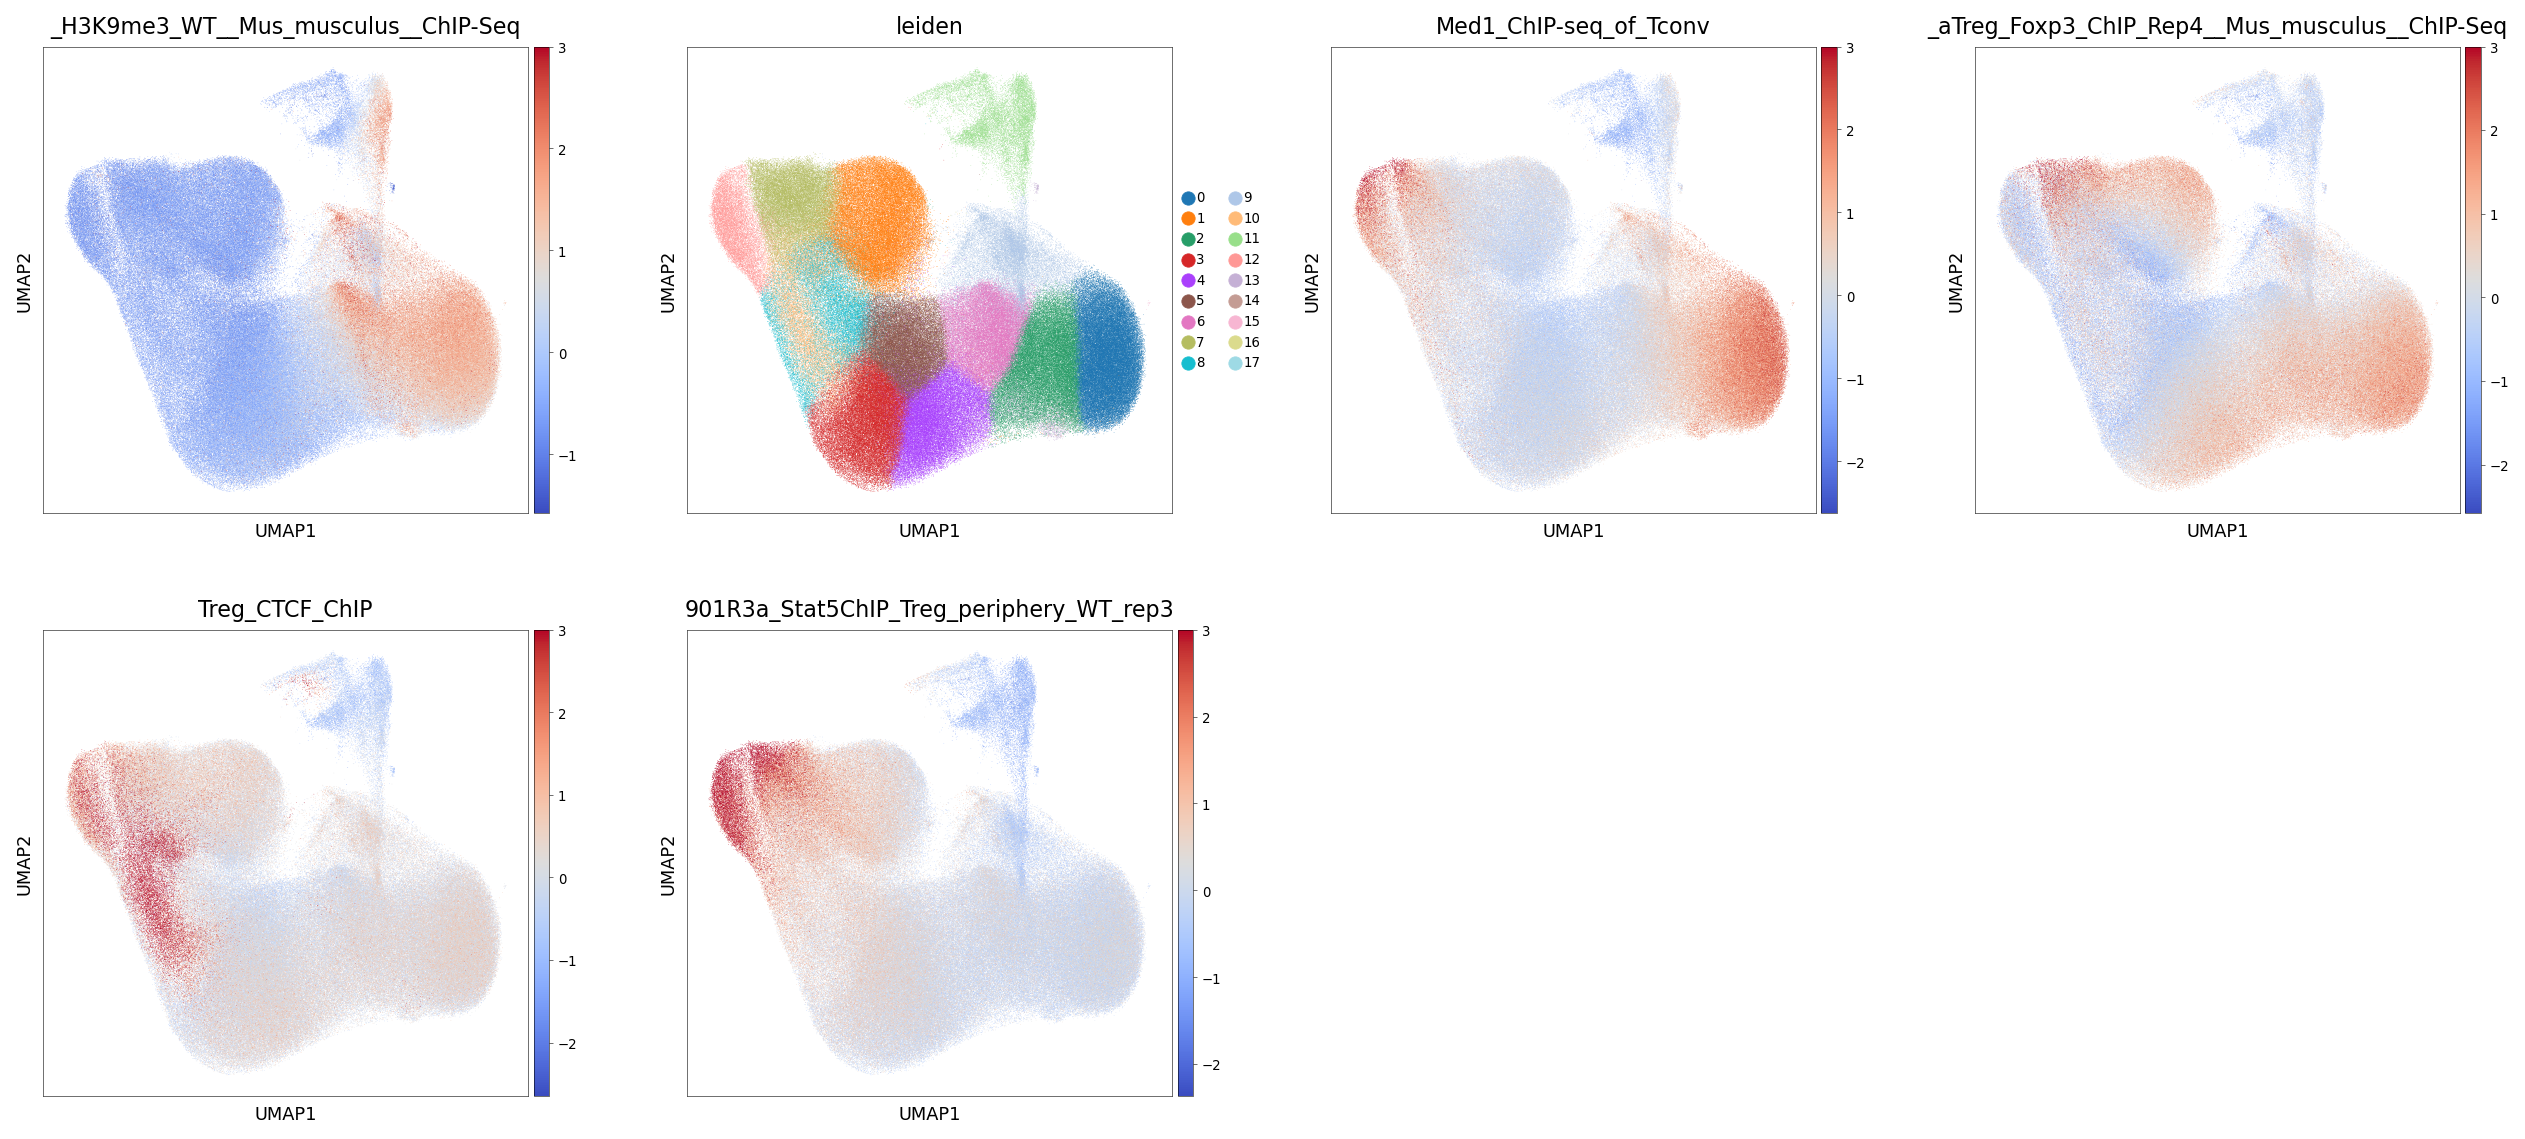

In [21]:
sc.pl.umap(adata, color=[ '_H3K9me3_WT__Mus_musculus__ChIP-Seq', 'leiden',
                        'Med1_ChIP-seq_of_Tconv',
                        '_aTreg_Foxp3_ChIP_Rep4__Mus_musculus__ChIP-Seq',
                        'Treg_CTCF_ChIP', 
                        '901R3a_Stat5ChIP_Treg_periphery_WT_rep3',],
          vmax=3)

In [22]:
from matplotlib.colors import to_hex

def get_color(chrom, s, e, bedtool, cmap=sns.color_palette('vlag', as_cmap=True)):
    intersection = pbt.BedTool(list(zip(chrom, s, e))).intersect(bedtool, c=True)
    has_bedtool = get_col(intersection, -1).astype(int)
    has_bedtool_color = [to_hex(cmap(float(x))) for x in has_bedtool > 0]
    granges = [tuple_to_grange(*x) for x in zip(get_col(intersection, 0), 
                                                get_col(intersection, 1), 
                                                get_col(intersection, 2))]
    return has_bedtool, has_bedtool_color, granges

In [23]:
def add_to_obs(ad, add_dict, binarize=False):
    ad_inds = pbt.BedTool([grange_to_tuple(x) for x in ad.obs.index])
    for col, bedtool in add_dict.items():
        counts = get_col(ad_inds.intersect(bedtool, c=True), -1)
        if binarize==True:
            ad.obs[col] = (counts.astype(float) > 0).astype(float)
        else:
            ad.obs[col] = counts.astype(float)

In [24]:
from gtf_functions import make_tss_df

my_tss_df = pd.read_csv('./annotations/my_tss_df.csv', index_col = 0)

In [25]:
cool_treg = cooler.Cooler('./Treg_all.mcool::/resolutions/5000')
active_tss = pbt.BedTool.from_dataframe(my_tss_df).saveas()
tss = pbt.BedTool.from_dataframe(my_tss_df)

In [26]:
import glob 

pco = .05
new_diff_stat = pbt.BedTool('../../snakemake_sras/differential/new_stat5/processed/stat5_Treg_periphery_vs_Tconv_periphery_thresh=0.csv')
new_treg_stat = add_chr_to_bedtool(new_diff_stat.filter(lambda x: (float(x[-1]) < pco) & (float(x[-2]) > 0)).saveas())
new_ns_stat = add_chr_to_bedtool(new_diff_stat.filter(lambda x: (float(x[-1]) > pco)).saveas())

foxp3_peaks_yuri = add_chr_to_bedtool(pbt.BedTool('./peaks/foxp3/peaks_yuri.txt'))
h3k27ac_peaks = add_chr_to_bedtool(pbt.BedTool('peaks/differential/all_threshold_27ac.csv'))
h3k27ac_peaks_df = h3k27ac_peaks.to_dataframe()

diff_tcon_v_treg = all_tcon_v_treg.filter(lambda x: float(x[-1]) < .05).saveas()
treg_higher_atac = diff_tcon_v_treg.filter(lambda x: float(x[-2]) < 0).saveas()
tcon_higher_atac = diff_tcon_v_treg.filter(lambda x: float(x[-2]) > 0).saveas()

In [27]:
import glob

add_dict = {
    'treg_atac' :     treg_higher_atac,
    'tcon_atac' :     tcon_higher_atac,
    'tss' :     tss,
    'active_tss' :     active_tss,
    'all_atac' :     all_tcon_v_treg,
    "new_treg_stat" : new_treg_stat,
    "new_ns_stat" : new_ns_stat,
    "foxp3_peaks_yuri" : add_chr_to_bedtool(foxp3_peaks_yuri),
    "h3k27ac_peaks" : add_chr_to_bedtool(h3k27ac_peaks),
    'treg_h3k27ac' : pbt.BedTool.from_dataframe(h3k27ac_peaks_df[(h3k27ac_peaks_df['score'] < 0) & (h3k27ac_peaks_df['strand'] < 0.05)]),

}

for file in glob.glob('./peaks/motifs/all_ctcf_peaks_p=*.txt'):
    p = file.split("p=")[1].split(".txt")[0]
    ctcf_file = pbt.BedTool(file)
    add_dict[f'ctcf_p={p}'] = ctcf_file
    
add_to_obs(adata, add_dict, binarize=True)


pref = './final_loops/processed_DESEQ/'
add_dict = {}
for threshpath in glob.glob(pref + '*'):
    thresh = threshpath.split("/")[-1].split("=")[-1]
    add_dict[f'treg_ancs_thresh={thresh}'] = add_chr_to_bedtool(pbt.BedTool(threshpath + '/Treg_ancs.csv'))
    add_dict[f'tcon_ancs_thresh={thresh}'] = add_chr_to_bedtool(pbt.BedTool(threshpath + '/Tcon_ancs.csv'))
    add_dict[f'ns_ancs_thresh={thresh}'] = add_chr_to_bedtool(pbt.BedTool(threshpath + '/ns_ancs.csv'))
    add_dict[f'all_ancs_thresh={thresh}'] = add_chr_to_bedtool(pbt.BedTool(threshpath + '/all_ancs.csv'))
    
all_loops = add_chr_to_bedtool(pbt.BedTool(threshpath + '/all_loops.csv'))    
all_ancs  = add_chr_to_bedtool(pbt.BedTool(threshpath + '/all_ancs.csv'))

metaloop_anchors = add_chr_to_bedtool(pbt.BedTool('./final_loops/metaloops/refined_metaloops/refined_metaloop_anchors.bed'))
metaloop_anchors_in_ancs = metaloop_anchors.intersect(all_ancs, u=True)
cluster_labels = pbt.BedTool('for_susie/250kb_anchors_with_cluster_label.bed')


add_dict.update({
    'metaloop_anchors_in_ancs' : metaloop_anchors_in_ancs,
    'metaloop_anchors' : metaloop_anchors,
})

for u in np.unique(get_col(cluster_labels, -1)):
    add_dict[f'cluster={u}'] = add_chr_to_bedtool(cluster_labels).filter(lambda x: x[-1] == u).saveas()
    
add_to_obs(adata, add_dict, binarize=False)

In [28]:
smoothed_connectivity_matrix = (adata.obsp['connectivities']**2)

colsoi = ['tss', 'active_tss', 'all_atac', 'ctcf_p=0.01', 'ctcf_p=1e-05',
          'ctcf_p=1e-08', 'ctcf_p=1e-11', 'treg_ancs_thresh=0.25', 
          'tcon_ancs_thresh=0.25', 'ns_ancs_thresh=0.25', 
          'treg_ancs_thresh=0', 'tcon_ancs_thresh=0', 'ns_ancs_thresh=0', 
          'metaloop_anchors', 'metaloop_anchors_in_ancs',
          'all_ancs_thresh=0',
         ]

for col in colsoi:
    vals_to_smooth = scipy.sparse.csr_matrix(np.ravel(
                adata.obs[col].values > 0).astype(float))

    j = vals_to_smooth@smoothed_connectivity_matrix
    adata.obs[f'{col}_smooth'] = np.ravel(j.todense())
    adata.obs[f'{col}'] = np.ravel(vals_to_smooth.todense())

In [29]:
adata.write_h5ad('./final_chipseq_adata/FINAL_adata_updated')